# Aula 4 - Plotly

[Documentação Plotly Express](https://plotly.com/python-api-reference/plotly.express.html)

### Imports e Configurações

In [8]:
# !pip install plotly
# !pip install -U kaleido
# !pip install -U nbformat
# !pip install statsmodels

In [9]:
# importando a biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
# definindo as configurações

# autoreload permite a recarga dos módulos antes da execução dos códigos
# doc: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%reload_ext autoreload
%autoreload 2

### Carregando as Bases de Dados

In [11]:
# importando a base 'flights' do seaborn
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [12]:
# importando a base 'penguins' do seaborn

penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Gráficos

Processo de plotagem:
1. entender os dados
2. entender a questão de negócio
3. realizar as transformações necessárias
4. realizar a plotagem

Documentação:

https://plotly.com/python-api-reference/

#### Gráfico de Barras

In [13]:
# observando a base de dados

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Qual a quantidade de pinguins por ilha?

Comparativo da sintaxe:

* Seaborn

    > `sns.countplot(data=df_data, x='x_data')`

* Plotly

    > `px.histogram(data_frame=df_data, x='x_data')`

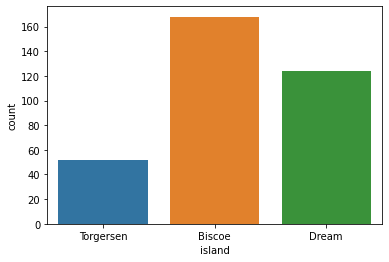

In [14]:
# visualizando com o seaborn - countplot

sns.countplot(data=penguins, x='island');

In [15]:
# visualizando com o plotly - bar

px.bar(data_frame=penguins, x='island')

In [16]:
# realizando transformações

x_bar = penguins['island'].value_counts().index
y_bar = penguins['island'].value_counts().values

In [17]:
px.bar(x=x_bar, y=y_bar)

In [18]:
# visualizando com o histogram - bar

px.histogram(data_frame=penguins, x='island')

Qual a quantidade de pinguins por ilha e segmentado por sexo?

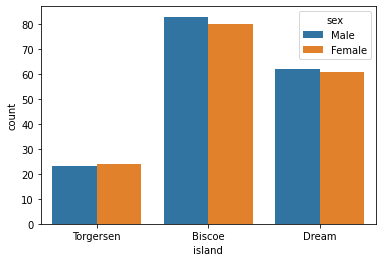

In [19]:
# visualizando com o seaborn - countplot

sns.countplot(data=penguins, x='island', hue='sex')
plt.show()

In [20]:
# visualizando com o histogram - bar

px.histogram(data_frame=penguins, x='island', color='sex')

In [21]:
# visualizando lado a lado

px.histogram(data_frame=penguins, x='island', color='sex', barmode='group')

Qual a média do comprimento da nadadeira por ilha, segmentado por espécie?

Comparativo da sintaxe:

* Seaborn

    > `sns.barplot(data=df_data, x='x_data', y='y_data', estimator='mean')`

* Plotly

    > `px.histogram(data_frame=df_data, x='x_data', y='y_data', histfunc='avg')`

    - 'count', 'sum', 'avg', 'min', e 'max'

In [22]:
# base de dados pinguins

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


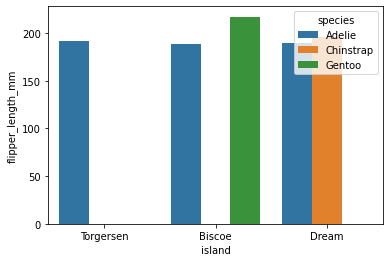

In [23]:
# utilizando o seaborn - barplot

sns.barplot(data=penguins, x='island', y='flipper_length_mm', hue='species', errorbar=None)
plt.show()

In [24]:
# utilizando o plotly - histogram

px.histogram(data_frame=penguins,
             x='island',
             y='flipper_length_mm',
             color='species',
             barmode='group',
             histfunc='avg',
             text_auto='.1f')

#### Estilizando um Gráfico

Transformando o layout completo do gráfico do plotly:
*    xaxis_title - titulo eixo x
*    yaxis_title - titulo eixo y
*    legend_title - titulo da legenda
*    font_color - cor da fonte
*    title - titulo do gráfico
*    template - template de formato do gráfico

In [25]:
# atribuindo o gráfico a uma variável 

fig = px.histogram(data_frame=penguins,
             x='island',
             y='flipper_length_mm',
             color='species',
             barmode='group',
             histfunc='avg',
             text_auto='.1f')

fig

In [26]:
# alterando os parâmetros estéticos do gráfico

fig.update_layout(
    xaxis_title={
        'text': 'Ilha',
        'font_size': 12
    },
    yaxis_title={
        'text': 'Média da Nadadeira',
        'font_size': 12
    },
    legend_title={
        'text': 'Espécie',
        'font_size': 12
    },
    font_color='grey',
    font_size=10,
    title={
        'text': 'Média do Comprimento da Nadadeira por Ilha e Sexo',
        'font_family': 'Verdana',
        'font_color': 'black',
        'font_size': 16
    },
    template='presentation'
)

Outros templates:
- ggplot2,
- seaborn,
- simple_white,
- plotly,
- plotly_white,
- plotly_dark,
- presentation,
- xgridoff,
- ygridoff,
- gridon,
- none

In [27]:
# alterando o template
fig.update_layout(template='seaborn')

#### Exportando um Gráfico

In [28]:
# exportando o gráfico em uma página html
fig.write_html('grafico.html')

In [29]:
# exportando o gráfico como uma figura
fig.write_image('grafico.png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


#### Gráfico de Histograma

In [ ]:
# observando o dataframe
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Qual a distribuição da massa corporal facetado por sexo e espécie?

In [ ]:
# visualizando a distribuição com plotly - histogram
px.histogram(data_frame=penguins, x='body_mass_g')

In [ ]:
# facetando a visualização
px.histogram(data_frame=penguins.dropna(), 
             x='body_mass_g',
             color='sex',
             facet_col='sex',
             facet_row='species',
             height=700)

#### Gráfico de Caixa

In [ ]:
# base de dados penguins

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Temos outliers no peso corporal dos pinguins?

In [ ]:
# visualizando a distibuição com plotly - box

px.box(data_frame=penguins, y='body_mass_g')

In [ ]:
# segmentando a distribuição por sexo

px.box(data_frame=penguins, y='body_mass_g', x='sex')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# segmentando a distribuição por sexo e espécie

px.box(data_frame=penguins, y='body_mass_g', x='sex', color='species')

#### Gráfico de Linhas

In [ ]:
# base de dados flights

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Qual a quantidade de passageiros por ano?

In [ ]:
# transformando os dados

flights.groupby('year')['passengers'].sum().reset_index()


,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


In [ ]:
# visualizando com plotly - line

x_line = flights.groupby('year')['passengers'].sum().index
y_line = flights.groupby('year')['passengers'].sum().values
px.line(x=x_line, y=y_line)

In [ ]:
df_plot = flights.groupby('year')['passengers'].sum().reset_index()
df_plot.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


In [ ]:
px.line(data_frame=df_plot, x='year', y='passengers', markers=True)

Qual a média de passageiros por ano?

In [ ]:
# visualizando a média de passageiros por ano com plotly - line

x_line = flights.groupby('year')['passengers'].mean().index
y_line = flights.groupby('year')['passengers'].mean().values
px.line(x=x_line, y=y_line, markers=True)

Qual a quantidade de passageiros por ano, segmentado por mês?

In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# visualizando com ploty - line

linhas = px.line(data_frame=flights, x='year', y='passengers', color='month')
linhas

In [ ]:
# transformando o layout do gráfico do plotly

linhas.update_layout(template='plotly_dark')

#### Gráfico de Dispersão

In [ ]:
# base de dados pinguins

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Qual a relação entre o comprimento e a profundidade do bico?

In [ ]:
# visualizando com plotly - scatter

px.scatter(data_frame=penguins, x='bill_length_mm', y='bill_depth_mm')

In [ ]:
# segmentando por espécie

px.scatter(data_frame=penguins, x='bill_length_mm', y='bill_depth_mm', color='species')

In [ ]:
# adicionando linha de tendencia

px.scatter(data_frame=penguins, 
           x='bill_length_mm', 
           y='bill_depth_mm',
           trendline='ols')

In [ ]:
# segmentando por espécie e adicionando linhas de tendencia

px.scatter(data_frame=penguins, 
           x='bill_length_mm', 
           y='bill_depth_mm',
           color='species',
           trendline='ols')

### Atividade

Resolver as questões abaixo. Em seguida, criar um repositório público no GitHub e armazenar no notebook criado, enviando somente o link do NOTEBOOK para o [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#### Questão 1

Criar 2 vetores, um com uma série historica de anos de 1970 até 2022 e um segundo vetor com a mesma quantidade de observações e números inteiros aleatórios variando de 1 a 20000. Em seguida montar um gráfico com a melhor visualização para os dados com a biblioteca Plotly Express.

In [ ]:
anos = np.arange(1970, 2023)
anos

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
valores = np.random.randint(1, 20_001, len(anos))
valores

array([17142,  5680,  8111, 16346, 13537,  2144,  1190,  3298,  8724,
       17154,  9074, 19159,  7002, 19625,  4368,  4675, 19078,  2160,
       19944,  9287, 19728,  5696, 12708, 12560, 17046, 15380, 14041,
       10912, 11760, 12832,  4119,  2571,  9287, 10447, 15673,  4711,
         770,  4652,  9423,  1210, 18012, 15549,  5737, 12728,  5423,
        5562,  1888, 10910, 16260, 10096,  8697,  5075,  3376])

In [30]:
px.line(x=anos, y=valores, markers=True)

#### Questão 2

Criar uma lista com as letras do alfabeto, depois um vetor com a mesma quantidade de observações e números inteiros aleatórios variando de 10 a 100. Em seguida montar um gráfico com a melhor visualização para os dados com a biblioteca Plotly Express.

Utilize o objeto string para resolver a questão:

```
import string
string.ascii_lowercase
```

In [31]:
import string


In [34]:
letras = list(string.ascii_lowercase)
len(letras)

26

In [35]:
num = np.random.randint(1, 101, len(letras))
num

array([80, 27, 61,  1, 55, 66, 86,  6, 34, 21, 15, 90, 50, 97, 48, 83, 25,
       46,  8, 62, 72,  8, 82, 29,  2, 65])

In [41]:
px.bar(x=letras, y=num, text=num, color=letras)

#### Questão 3

Criar 2 vetores com a mesma quantidade de observações, 500 registros , de números inteiros aleatórios, o primeiro variando de 1000 a 2000, o segundo variando de 5000 a 10000. Em seguida montar um gráfico com a melhor visualização para os dados com a biblioteca Plotly Express, demonstrando relação entre as variáveis.

In [42]:
arr1 = np.random.randint(1_000, 2_001, 500)
arr2 = np.random.randint(5_000, 10_001, 500)

In [45]:
px.scatter(x=arr1, y=arr2)

#### Questão 4

Criar uma vetor com 500 registros de números inteiros variando entre 125 e 857. Em seguida montar um gráfico que mostre a dispersão com a melhor visualização para os dados com a biblioteca Plotly Express.

In [46]:
vet1 = np.random.randint(125, 858, 500)

In [48]:
px.histogram(vet1)

In [52]:
px.box(y = vet1)